# code for in silico screening of RNA-seq for UPF1 study

In [1]:
import pandas as pd

In [2]:
# Import the data to pandas dataframe
data = pd.read_table('C:/research/RNAseq_database/RNAseq_sum/filtered/cuffdiff_result_mRNA_all_filtered.txt')

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

UPF1 target genes are determined by Imamachi et al, 2017 Genome Res.  
http://genome.cshlp.org/content/early/2017/02/15/gr.206060.116/suppl/DC1  
There are 245 transcripts (BRIC-seq >2 and RIP-seq >2)

In [6]:
target = data[data['gene_symbol'].isin(['ABHD4','ACACB','ADM5','ADO','AEN','AHRR','AIF1L','AMIGO3','AMMECR1L','AMOTL2','ANKRD52','AP3S2','AP5S1','ARFRP1','ARMC7','ATF3','ATF5','ATP6V0E2','BAK1','BANP','BBS4','BHLHA15','BRD2','BRF2','C10orf76','C11orf68','C11orf84','C14orf79','C15orf39','C19orf21','C19orf25','C19orf48','C1orf35','C3orf18','C3orf52','C8orf58','CACNB1','CACNB3','CALHM2','CAMTA2','CCDC94','CD99L2','CDT1','CEMP1','CENPBD1','CHFR','CHID1','CHST3','CLSTN1','COMMD5','CUL9','CYB561D1','CYB5R1','CYBASC3','CYP2S1','DAPK3','DDIT3','DDIT4','DEDD2','DENND3','DMBT1','DNAJB1','DNAJB2','DTX2','DUSP1','DUSP2','E2F1','EFNA1','ERF','EVC','FADD','FAM108B1','FAM168A','FAM193A','FAM43A','FAM53B','FBF1','FBXL12','FHL3','FUK','GADD45B','GATA2','GBA2','GFER','GFOD2','GLTPD1','GPN2','GPR157','H2AFX','HINFP','HIST3H2A','HSPG2','IER2','ING5','INHBE','IQCC','IRGQ','IRS2','ITPKC','ITPRIP','JRK','JUN','JUNB','KCTD7','KIAA0040','KLF10','KLHL17','LAMA5','LAMC3','LCAT','LDLR','LRRK1','LTBP3','MAP3K12','MAP3K14','MAST3','MED15','MFI2','MGAT5B','MID1IP1','MIER2','MLL4','MOAP1','MOB2','MRC2','MRM1','MVD','MVK','NAT9','NCOR2','NOD1','NPHP4','NPIP','NUDT16L1','OGFOD2','OSGIN1','P4HA3','PCSK6','PEA15','PFKFB4','PGAP3','PLAU','PLD6','PLEKHG3','PLXND1','POFUT2','PPP1R15A','PPP1R18','PPP1R37','PPP6R2','PRDM11','PRKCE','PRKRIP1','PRR5L','PTK6','PTPN18','PYGB','RAB3D','RASSF1','RFNG','RGS3','RNF123','RNF19B','RUNX3','SAP30BP','SCD','SDHAF1','SEMA3B','SERTAD1','SESN2','SGK1','SGSM3','SH3BP2','SLC25A25','SLC45A4','SLC9A8','SMG5','SNAI1','SPEG','ST3GAL3','ST3GAL4','STK16','STX1A','SUN2','SUV420H2','SWI5','SZT2','TADA2A','TADA2B','TANGO2','TBX3','TFEB','THAP3','THAP7','THEM6','TIMM10B','TLX3','TMBIM1','TMEM129','TMEM222','TMEM234','TMEM25','TMEM41A','TMEM63A','TMEM79','TNPO2','TRIM35','TRMT61A','TSC22D1','TTC31','TUFT1','TXNL4B','UBALD2','UBR4','UCN2','ULK1','UNC119B','UPP1','URM1','USP35','USP36','ZBTB17','ZFP36L2','ZFP41','ZFYVE27','ZMIZ2','ZNF142','ZNF212','ZNF213','ZNF276','ZNF317','ZNF324B','ZNF335','ZNF500','ZNF556','ZNF629','ZNF641','ZNF672','ZNF687','ZNF689','ZNF696','ZNF697','ZNF707','ZNF747','ZNF783','ZZEF1'])]
target = target.T
target = target.fillna(0)
target = target.convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## UPF1 vs UPF1-targets  
To evaluate whether UPF1-targets are up-regulated or down-regulated, we count the number og genes that increased or decreased.

In [8]:
target["positive1"] = target[target > 0.5].count(axis =1)
target["negative1"] = target[target < -0.5].count(axis =1)
target["diff1"] = target["positive1"] - target["negative1"]

In [9]:
UPF1 = data[data.gene_symbol == 'UPF1']
UPF1t = UPF1.T
UPF1change = UPF1t[3:]

In [10]:
tat_diff = target.ix[3:, 243] # target has 244 columns. The last column coresponds to the "diff1"
UPF1_vs_tatd = pd.concat([UPF1change, tat_diff], axis =1)

#UPF1_vs_tatd = UPF1_vs_tatd.sort(72)
UPF1_vs_tatd = UPF1_vs_tatd.fillna(0) 

In [11]:
UPF1_vs_tatd.columns = ['UPF1', 'diff1']

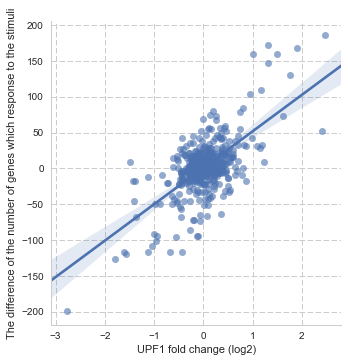

In [12]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.lmplot('UPF1', 'diff1', data = UPF1_vs_tatd, fit_reg = True, scatter_kws={"alpha":0.6})
plt.xlabel('UPF1 fold change (log2)')
plt.ylabel('The difference of the number of genes which response to the stimuli')

UPF1 target genes are determined by Imamachi et al, 2017 Genome Res.  
http://genome.cshlp.org/content/early/2017/02/15/gr.206060.116/suppl/DC1  
There are 57 transcripts (BRIC-seq >1(log2) and RIP-seq >1(log2), RNA-seq >1 (log2))

In [13]:
target5 = data[data['gene_symbol'].isin(['ABHD4','AP3S2','ARFRP1','ATF3','BAK1','BBS4','BRD2','BRF2','C10orf76','C19orf25','C19orf48','CACNB1','CACNB3','CALHM2','CHFR','CYP2S1','DDIT3','DEDD2','DMBT1','DNAJB2','EVC','GADD45B','INHBE','IRS2','LCAT','MAP3K14','NAT9','NPIP','OSGIN1','PCSK6','PEA15','PFKFB4','PLAU','POFUT2','PPP1R15A','PRKCE','PRKRIP1','RASSF1','SMG5','STX1A','TANGO2','TIMM10B','TMBIM1','TMEM222','TMEM79','TRMT61A','TXNL4B','UCN2','UNC119B','UPP1','ZNF335','ZNF556'])]

In [14]:
target5 = target5.T
target5 = target5.fillna(0)
target5 = target5.convert_objects(convert_numeric=True)

target5["positive1"] = target5[target5 > 0.5].count(axis =1)
target5["negative1"] = target5[target5 < -0.5].count(axis =1)
target5["diff1"] = target5["positive1"] - target5["negative1"]

tat_diff5 = target5.ix[3:, 53] # target has 57 columns. The last column coresponds to the "diff1"
UPF1_vs_tatd5 = pd.concat([UPF1change, tat_diff5], axis =1)

#UPF1_vs_tatd = UPF1_vs_tatd.sort(72)
UPF1_vs_tatd5 = UPF1_vs_tatd5.fillna(0) 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


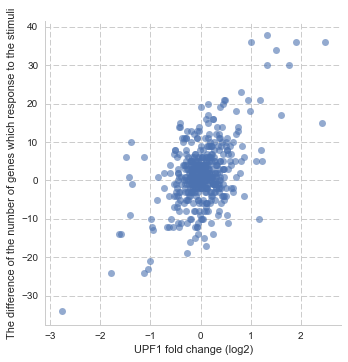

In [15]:
UPF1_vs_tatd5.columns = ['UPF1', 'diff1']

sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.lmplot('UPF1', 'diff1', data = UPF1_vs_tatd5, fit_reg = False, scatter_kws={"alpha":0.6})
plt.xlabel('UPF1 fold change (log2)')
plt.ylabel('The difference of the number of genes which response to the stimuli')